In [2]:
# utilizado para manejos de directorios y rutas
import os

# Computacion vectorial y cientifica para python
import numpy as np

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

In [3]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from datetime import datetime

In [4]:
#Carga de dataset
data = pd.read_csv('/content/Mobile phone price.csv')

In [5]:
print(data)

       Brand              Model Storage    RAM  Screen Size (inches)  \
0      Apple      iPhone 13 Pro   128 GB   6 GB                  6.1   
1    Samsung   Galaxy S21 Ultra   256 GB  12 GB                  6.8   
2    OnePlus              9 Pro   128 GB   8 GB                  6.7   
3     Xiaomi  Redmi Note 10 Pro   128 GB   6 GB                 6.67   
4     Google            Pixel 6   128 GB   8 GB                  6.4   
..       ...                ...      ...    ...                  ...   
402  Samsung   Galaxy Note20 5G      128      8                  6.7   
403   Xiaomi      Mi 10 Lite 5G      128      6                 6.57   
404    Apple  iPhone 12 Pro Max      128      6                  6.7   
405     Oppo              Reno3      128      8                  6.4   
406  Samsung    Galaxy S10 Lite      128      6                  6.7   

            Camera (MP)  Battery Capacity (mAh) Price ($)  
0          12 + 12 + 12                    3095       999  
1    108 + 10 +

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Brand                   407 non-null    object
 1   Model                   407 non-null    object
 2   Storage                 407 non-null    object
 3   RAM                     407 non-null    object
 4   Screen Size (inches)    407 non-null    object
 5   Camera (MP)             407 non-null    object
 6   Battery Capacity (mAh)  407 non-null    int64 
 7   Price ($)               407 non-null    object
dtypes: int64(1), object(7)
memory usage: 25.6+ KB


In [7]:
#variables categoricas
columnas_categoricas = data.select_dtypes(include=['object']).columns

In [8]:
#Procesamiento de frases o palabras
for columna in columnas_categoricas:
  le = LabelEncoder()
  data[columna] = le.fit_transform(data[columna])

In [9]:
#resultado
print(data)

     Brand  Model  Storage   RAM   Screen Size (inches)  Camera (MP)  \
0        0    232         1    15                     8           15   
1       12    100         4     1                    35            0   
2        9     19         1    18                    31           53   
3       15    178         1    15                    30          119   
4        4    162         1    18                    15           87   
..     ...    ...       ...   ...                   ...          ...   
402     12     95         0    17                    31           19   
403     15    111         0    14                    26           70   
404      0    229         0    14                    31           17   
405     10    188         0    17                    15           59   
406     12     96         0    14                    31           57   

     Battery Capacity (mAh)  Price ($)  
0                      3095         88  
1                      5000         45  
2           

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Brand                   407 non-null    int64
 1   Model                   407 non-null    int64
 2   Storage                 407 non-null    int64
 3   RAM                     407 non-null    int64
 4   Screen Size (inches)    407 non-null    int64
 5   Camera (MP)             407 non-null    int64
 6   Battery Capacity (mAh)  407 non-null    int64
 7   Price ($)               407 non-null    int64
dtypes: int64(8)
memory usage: 25.6 KB


In [11]:
# Lectura de Datos
X = data.iloc[:, :7]
y = data.iloc[:, 7]
m = y.size

In [12]:
print(X)
print('*'*25)
print(y)

     Brand  Model  Storage   RAM   Screen Size (inches)  Camera (MP)  \
0        0    232         1    15                     8           15   
1       12    100         4     1                    35            0   
2        9     19         1    18                    31           53   
3       15    178         1    15                    30          119   
4        4    162         1    18                    15           87   
..     ...    ...       ...   ...                   ...          ...   
402     12     95         0    17                    31           19   
403     15    111         0    14                    26           70   
404      0    229         0    14                    31           17   
405     10    188         0    17                    15           59   
406     12     96         0    14                    31           57   

     Battery Capacity (mAh)  
0                      3095  
1                      5000  
2                      4500  
3              

In [16]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma


In [17]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)

print(X)
print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)
print(X_norm)

     Brand  Model  Storage   RAM   Screen Size (inches)  Camera (MP)  \
0        0    232         1    15                     8           15   
1       12    100         4     1                    35            0   
2        9     19         1    18                    31           53   
3       15    178         1    15                    30          119   
4        4    162         1    18                    15           87   
..     ...    ...       ...   ...                   ...          ...   
402     12     95         0    17                    31           19   
403     15    111         0    14                    26           70   
404      0    229         0    14                    31           17   
405     10    188         0    17                    15           59   
406     12     96         0    14                    31           57   

     Battery Capacity (mAh)  
0                      3095  
1                      5000  
2                      4500  
3              

In [18]:
# Añade el termino de interseccion a X
# (Columna de unos para X0)
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [14]:
print(X)

     Brand  Model  Storage   RAM   Screen Size (inches)  Camera (MP)  \
0        0    232         1    15                     8           15   
1       12    100         4     1                    35            0   
2        9     19         1    18                    31           53   
3       15    178         1    15                    30          119   
4        4    162         1    18                    15           87   
..     ...    ...       ...   ...                   ...          ...   
402     12     95         0    17                    31           19   
403     15    111         0    14                    26           70   
404      0    229         0    14                    31           17   
405     10    188         0    17                    15           59   
406     12     96         0    14                    31           57   

     Battery Capacity (mAh)  
0                      3095  
1                      5000  
2                      4500  
3              

In [19]:
def computeCostMulti(X, y, theta):
    # Inicializa algunos valores utiles
    m = y.shape[0] # numero de ejemplos de entrenamiento

    J = 0

    h = np.dot(X, theta)

    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))

    return J


In [20]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):

    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()

    J_history = []

    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        J_history.append(computeCostMulti(X, y, theta))

    return theta, J_history

theta calculado por el descenso por el gradiente: [ 41.13112981  -3.82837339   0.61197134 -12.5171931   -3.41027633
   1.65205022  -2.99845132  -8.86313085]
El valor predecido es (usando el descenso por el gradiente): 54.4879


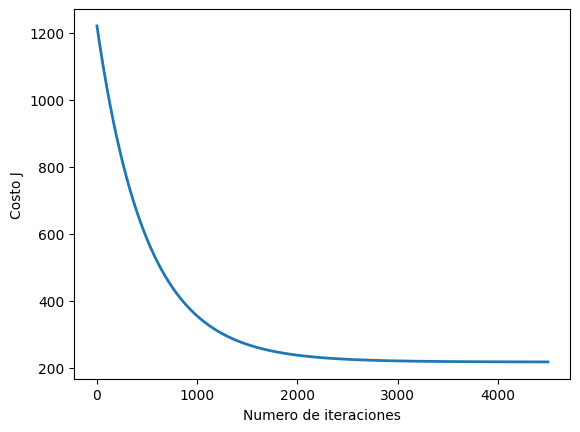

In [21]:
alpha = 0.001
num_iters = 4500

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(8)
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

# Estimar el precio del teléfono movil con distintas caracteristicas
X_array = [1, 1, 245, 4, 17, 9, 1.18, 4300]
X_array[1:8] = (X_array[1:8] - mu) / sigma
price = np.dot(X_array, theta)

print('El valor predecido es (usando el descenso por el gradiente): {:.4f}'.format(price))

In [22]:
X_array = [1, 1, 245, 4, 17, 9, 1.18, 4300]
X_array[1:8] = (X_array[1:8] - mu) / sigma

In [23]:
X_array[1:8]

[-2.1899035925100696,
 1.7997268450291208,
 -0.019753364991888518,
 0.8916248519302953,
 -1.5741839761096637,
 -1.6925066004381821,
 -0.4728336516416878]

In [24]:
#Carga de dataset
data = pd.read_csv('/content/Mobile phone price.csv')

In [25]:
#variables categoricas
columnas_categoricas = data.select_dtypes(include=['object']).columns
#variables fechas
columnas_fechas = data.select_dtypes(include=['datetime64']).columns

In [26]:
#Procesamiento de frases o palabras
for columna in columnas_categoricas:
  le = LabelEncoder()
  data[columna] = le.fit_transform(data[columna])

In [27]:
# Generar un nuevo dataset con la columna movida
nuevo_dataset = data.copy()

# Guardar el nuevo DataFrame en un archivo CSV
nuevo_dataset.to_csv('Mobile phone price2.csv', index=False)

print("Archivo 'Mobile phone price2.csv' creado exitosamente.")

Archivo 'Mobile phone price2.csv' creado exitosamente.


In [28]:
#Carga de dataset
data = pd.read_csv('/content/Mobile phone price2.csv')

In [29]:
print(data)

     Brand  Model  Storage   RAM   Screen Size (inches)  Camera (MP)  \
0        0    232         1    15                     8           15   
1       12    100         4     1                    35            0   
2        9     19         1    18                    31           53   
3       15    178         1    15                    30          119   
4        4    162         1    18                    15           87   
..     ...    ...       ...   ...                   ...          ...   
402     12     95         0    17                    31           19   
403     15    111         0    14                    26           70   
404      0    229         0    14                    31           17   
405     10    188         0    17                    15           59   
406     12     96         0    14                    31           57   

     Battery Capacity (mAh)  Price ($)  
0                      3095         88  
1                      5000         45  
2           

In [30]:
# Lectura de Datos
X = data.iloc[:, :7]
y = data.iloc[:, 7]
m = y.size

In [31]:
print(X)
print('*'*25)
print(y)

     Brand  Model  Storage   RAM   Screen Size (inches)  Camera (MP)  \
0        0    232         1    15                     8           15   
1       12    100         4     1                    35            0   
2        9     19         1    18                    31           53   
3       15    178         1    15                    30          119   
4        4    162         1    18                    15           87   
..     ...    ...       ...   ...                   ...          ...   
402     12     95         0    17                    31           19   
403     15    111         0    14                    26           70   
404      0    229         0    14                    31           17   
405     10    188         0    17                    15           59   
406     12     96         0    14                    31           57   

     Battery Capacity (mAh)  
0                      3095  
1                      5000  
2                      4500  
3              

In [32]:
X = np.concatenate([np.ones((m, 1)), X], axis=1)

In [33]:
# importante que para usar m>n, evitar datos redundantes, no se normaliza
def normalEqn(X, y):

    theta = np.zeros(X.shape[1])

    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)

    return theta

In [34]:
# Calcula los parametros con la ecuación de la normal
theta = normalEqn(X, y);

# Muestra los resultados optenidos a partir de la aplicación de la ecuación de la normal
print('Theta calculado a partir de la ecuación de la normal: {:s}'.format(str(theta)));

# Estimar el precio del teléfono móvil

X_array = [1, 1, 245, 4, 17, 9, 1.18, 4300]
price = np.dot(X_array, theta)

print('Precio predecido para el teléfono móvil (usando la ecuación de la normal) es: ${:.0f}'.format(price))

Theta calculado a partir de la ecuación de la normal: [ 1.27696431e+02 -8.20891668e-01  6.09891836e-03 -3.04581539e+00
 -7.98237305e-01  2.20966116e-01 -7.32517762e-02 -1.18278884e-02]
Precio predecido para el teléfono móvil (usando la ecuación de la normal) es: $54


In [ ]:
# Se puede observar que el precio predecido por el desenso gradiente es: 54.4879
# Y el precio por la ecuación normal es: 54
# La diferencia es 0.4879, se puede ver que es mínima